# 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st

data = pd.read_csv(r'C:\Users\Роман\Downloads\games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# 2
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [3]:
data = data.rename(columns={'Name': 'name','Platform':'platform','Year_of_Release' : 'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})

Поменял названия стобцов, привел все к нижнему регистру

In [4]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
data = data.dropna(subset='name')
data = data.dropna(subset='year_of_release')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [7]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [8]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [9]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']

# 3
Займусь исселедованием  
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

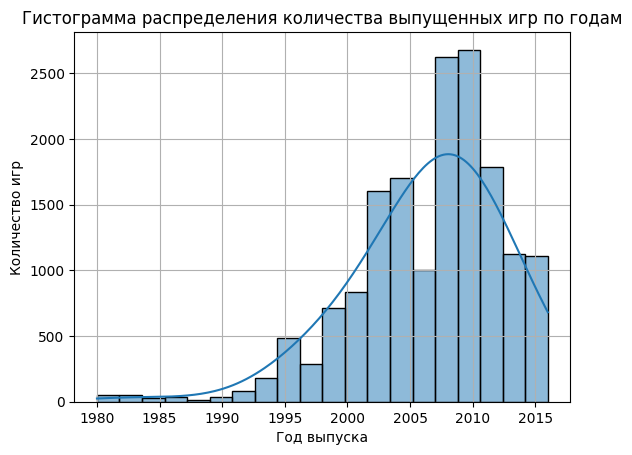

In [10]:
data_by_years = data.pivot_table(index='year_of_release',values='name',aggfunc='count')
#data_by_years.sort_values(by='name',ascending=False).rename(columns = {'name':'количество'}).plot(kind='bar')
sns.histplot(data=data_by_years, x=data_by_years.index, weights='name', bins=20, kde=True)
plt.title('Гистограмма распределения количества выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

#### Топ годы по выпускам игр 2008, 2009 и 2010 годы. Далее посмотрим, на какие платформы вышло больше всего игр и как долго они поддерживались

In [11]:
data_by_platform = data.groupby('platform')['total_sales'].sum()
data_by_platform.sort_values(ascending=False).head(5)


platform
PS2     1043.09
X360     876.36
Wii      813.47
PS3      796.75
DS       743.74
Name: total_sales, dtype: float64

Топ 5 платформ по продажам это PS2, XBOX360,Wii,PS3,DS
Разберем сроки жизни этих платформ 

In [12]:
top_platform = ['PS2','X360','Wii','PS3','DS']
data_top_platform = data.query('platform in @top_platform and year_of_release>1986')
data_top_platform_pivot = data_top_platform.groupby('platform').agg({
    'year_of_release': list              
}).reset_index()
fig = px.box(data_top_platform, x='platform', y='year_of_release', 
              labels={'platform': 'Платформа', 'year_of_release': 'Год выхода'},
              color='platform'
              )

fig.show()

* Wii жила с 2006 по 2013 годы
* DS жила с 2000 по 2012 годы
* X360 жила с 2005 по 2015 
* PS3 жила с 2006 по 2016 годы
* PS2 жила с 2000 по 2011  
Возможно, настоящая поддержка была больше или меньше, но фактическая поддержка, это пока на платформу выпускают игры 

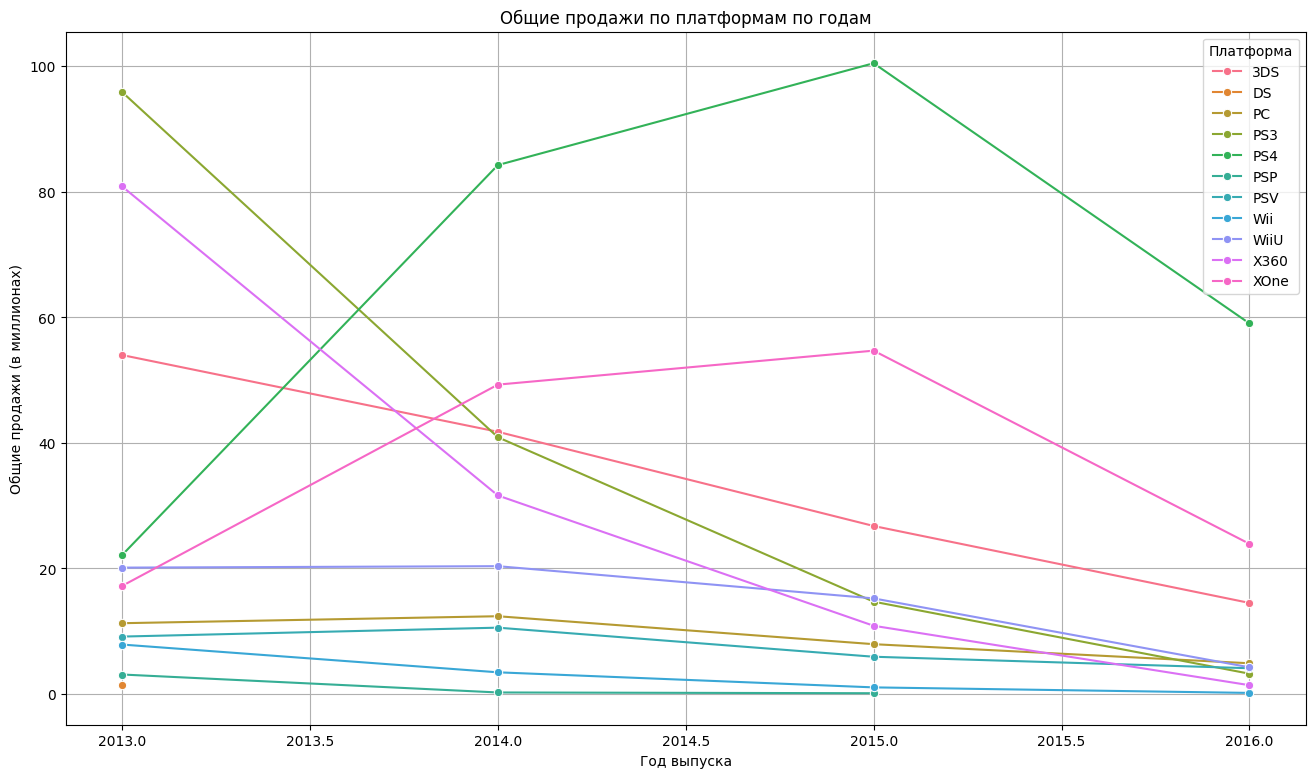

In [13]:
data_loc = data.query('year_of_release>2012')
data_analys = data_loc.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(16,9))
sns.lineplot(data=data_analys,x='year_of_release',y='total_sales',hue='platform',marker='o')
plt.title('Общие продажи по платформам по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Общие продажи (в миллионах)')
plt.legend(title='Платформа')
plt.grid(True)


 C 2013 по 2016 видно, что количетсво игр, выпускаемых на платформы - уменьшается. Заметно что в 2015 был пик PS4, что есть правда, но также постепенно количество выпускаемых игр уменьшатся. Топ платформ PS4,3DS,XBOX one

На 2017 год можно сделать уверенное предположение, что количество выпускаемых игр будет уменьшаться(может быть улучшается их качетсво), только если не выйдет какая то новая платфома

In [14]:
platforms_for_dashbord = ['PS2','X360','Wii','PS3','DS','GBA','PS4','PSP']
data_top_platform = data.query('platform in @platforms_for_dashbord')
data_for_dashboard = data_top_platform.groupby('platform').agg({
    'total_sales': list
})
long_df = data_for_dashboard.explode('total_sales').reset_index()
filtered_df = long_df[(long_df['total_sales'] >= 1) & (long_df['total_sales'] <= 5)]
fig = px.box(filtered_df, x='platform', y='total_sales', title='Глобальные продажи игр по платформам',
             labels={'platform': 'Платформа', 'total_sales': 'Глобальные продажи (в миллионах)'},
             color='platform')

fig.show()




По "ящику с усами" видно, что в среднем суммарные продажи по всем топовым платформам примерно в одном диапозоне, кроме PS4. Смело могу предположить, что с выходом нового поколения PS4 и XOne улучшается качество игр, соответсвенно увеличивается и цена, что влияет на глобальные продажи. 

Далее я проверю гипотезу на топ 5 популярных платформах, насколько сильно отзывы игрков и критиков влияют на продажи. Для наглядности применю диаграмму рассеивания.

In [15]:
data_top_platform = data_top_platform.query('total_sales < 15')
fig = px.scatter(
    data_top_platform,
    x='user_score',
    y='total_sales',
    title='Влияние оценок пользователей на продажи',
    labels={'user_score':'Оценка пользователей','total_sales':'Суммарные продажи(млн)'},
    facet_col='platform',
    color='platform'
)
fig.show()

Я ограничил столбец total_sales до 15 млн, потому что есть некоторые аномали в 50 или 60, которые слишком уменьшают визуальную иноформативность графика.  
Можем сделать выводы, что ДА, есть зависимость между оценками пользователей и суммарными продажами по каждой платформе

Теперь посмотрим, есть ли зависимость между оценками критиков и продажами

In [16]:
fig = px.scatter(
    data_top_platform,
    x='critic_score',
    y='total_sales',
    title='Влияние оценок пользователей на продажи',
    labels={'critic_score':'Оценка критиков','total_sales':'Суммарные продажи(млн)'},
    facet_col='platform',
    color='platform'
)
fig.show()

Также видна пряма зависимость с оценками критков на глобальны продажи, она даже более выраженная, чем от пользователей

Теперь посмотрим на распределение игр по жанрам

In [17]:
data_under2010 = data.query('year_of_release < 2010')
fig = px.histogram(
    data_under2010,
    x='genre',
    y='total_sales',
    labels={'genre':'Жанры игр','total_sales':'Глобальные продажи(млн)'},
    title='Распределение игр по жанрам до 2010 года',
    color='genre'
)
fig.show()

In [18]:
data_upper2010 = data.query('year_of_release > 2009')
fig = px.histogram(
    data_under2010,
    x='genre',
    y='total_sales',
    labels={'genre':'Жанры игр','total_sales':'Глобальные продажи(млн)'},
    title='Распределение игр по жанрам после 2010 года',
    color='genre'
)
fig.show()

Я разделил распредедение жанров глобально по годам до 2010 и после, было бы правильнее смотреть в каждый год, хотя и на этих двух распределениях видно, что тенденции останюстся примерно одинаковыми. Тройа лидеров это жанры: Action, Sports, Platform.  
А самые неприбыльные это Puzzle, Strategy, Adventure

# 4

### Составлю портерт пользователя каждого региона  
Определю: 
* Самые популярные платформы (топ-5). Опишу различия в долях продаж.
* Самые популярные жанры (топ-5). Поясню разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регион

Сгруппирую данные по регионам для жанров и платформ

In [19]:
na_users_platform = data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)
na_users_genre = data.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)
#380 platform 390 genre

In [20]:
eu_users_platform = data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False)
eu_users_genre = data.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False)
# 210 platform 210  genre

In [21]:
jp_users_platform = data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)
jp_users_genre = data.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)
#100 platform 100 for genre
jp_users_genre

,genre,jp_sales
7,Role-Playing,353.39
0,Action,160.14
10,Sports,134.93
4,Platform,130.71
3,Misc,107.02
2,Fighting,87.28
9,Simulation,63.64
5,Puzzle,56.68
6,Racing,56.63
1,Adventure,52.24


Построим гистограммы по платформама и жанрам для NA региона

In [22]:
na_users_platform_sorted = na_users_platform.query('na_sales > 380') #Отсекаю, чтобы показать топ 5
fig = px.histogram(
na_users_platform_sorted,
x='platform',
y='na_sales',
color='platform',
title='Рынок платформ в NA регионе',
labels={'platform':'Платформа','na_sales':'Продажи (млн)'}
)
fig.show()

In [23]:
na_users_genre_sorted = na_users_genre.query('na_sales > 390')#Отсекаю, чтобы показать топ 5
fig = px.histogram(
na_users_genre_sorted,
x='genre',
y='na_sales',
color='genre',
title='Рынок жанров игр в NA регионе',
labels={'genre':'Жанры игр','na_sales':'Продажи (млн)'}
)
fig.show()

Портер пользователя NA региона: скорее всего владелец отечественного XBOX и играет в Экшены, Спортсимуляторы или Шутеры

Глянем что там в EU

In [24]:
eu_users_platform_sorted = eu_users_platform.query('eu_sales > 210')#Отсекаю, чтобы показать топ 5
fig = px.histogram(
eu_users_platform_sorted,
x='platform',
y='eu_sales',
color='platform',
title='Рынок платформ в EU регионе',
labels={'platform':'Платформа','eu_sales':'Продажи (млн)'}
)
fig.show()

In [25]:
eu_users_genre_sorted = eu_users_genre.query('eu_sales > 210')#Отсекаю, чтобы показать топ 5
fig = px.histogram(
eu_users_genre_sorted,
x='genre',
y='eu_sales',
color='genre',
title='Рынок жанров игр в EU регионе',
labels={'genre':'Жанры игр','eu_sales':'Продажи (млн)'}
)
fig.show()

В EU регионе предпочтительнее отностятся к консолям от Sony, а вот по жарам тройка одинаковая, только на 4 месте уже не платформы, а гонки

Ну и к перейдем к Японцам

In [26]:
jp_users_platform_sorted = jp_users_platform.query('jp_sales > 100')#Отсекаю, чтобы показать топ 5
fig = px.histogram(
jp_users_platform_sorted,
x='platform',
y='jp_sales',
color='platform',
title='Рынок платформ в JP регионе',
labels={'platform':'Платформа','jp_sales':'Продажи (млн)'}
)
fig.show()

In [27]:
jp_users_genre_sorted = jp_users_genre.query('jp_sales > 100')#Отсекаю, чтобы показать топ 5
fig = px.histogram(
jp_users_genre_sorted,
x='genre',
y='jp_sales',
color='genre',
title='Рынок жанров игр в JP регионе',
labels={'genre':'Жанры игр','jp_sales':'Продажи (млн)'}
)
fig.show()

Типичный геймер японец отличается от Европейца или северео-американца. Он предпочитает отечественные консоли, и очень любит игры в жанре Role-Play(RP)

#### Проверим, насколько сильно влияет рейтинг ESRB на продажи в отдельных регионах

Для начала пояснение, что обозначают эти буквы  
* EC	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.
* E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
* E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
* T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
* M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных * наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
* AO	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, * азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.
* RP	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

In [28]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

NaN обозночает, что у игры нет рейтинга по причине мелкого издательства  или чего либо. Эти попруски заменять не буду и не знаю чем в принципе, но и удалять не нужно

In [29]:
fig = px.histogram(
    data,
    x='rating',
    y='na_sales',
    title='Влияние ESRB на продажи в NA',
    labels={'critic_score':'Оценка ESRB','na_sales':'Суммарные продажи(млн)'},
    color='rating'
)
fig.show()

In [30]:
fig = px.histogram(
    data,
    x='rating',
    y='eu_sales',
    title='Влияние ESRB на продажи в EU',
    labels={'rating':'Оценка ESRB','eu_sales':'Суммарные продажи(млн)'},
    color='rating'
)
fig.show()

In [31]:
fig = px.histogram(
    data,
    x='rating',
    y='jp_sales',
    title='Влияние ESRB на продажи в JP',
    labels={'rating':'Оценка ESRB','jp_sales':'Суммарные продажи(млн)'},
    color='rating'
)
fig.show()

Обработав все данные, можно составить портрет пользователя каждого региона.  
Для начала, хотел бы объединить пользователей из EU и NA в одну группу, так как и жанры игр(Экшен игры, Шутеры, Спортсимуляторы) и продажи по рейтингам ESRB в этих регионах одинаковы в соотношении. Только что есть различия по выборам платформ, на которых они играют. Из NA чаще выбирают отечественыне консоли Xbox.  
Координальные же различия мы видим в JP регионе, помимо того, что они все сидят либо на консолях от Sony или же Nintendo, они и чаще играют в RP игры, также ощутимо влияние рейтинга ERSB на продажи в этом регионе. В ТОПе находтся рейтинги E и T. Это игры для всех возрастов или игры 13+. Так что культура страны восходящего солнце показывает свой отпечаток в рынке видеигр, в частонсти выборов Японцев в играх и платформах

# 5

Проверим гипотезы:  
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


In [32]:
data_pc = data[data['platform'].isin(['PC'])]
print('Средняя оценка пользователей для игр на ПК:', round(data_pc['user_score'].mean(),2))


Средняя оценка пользователей для игр на ПК: 7.07


In [33]:
data_Xbox = data[data['platform'].isin(['XOne'])]
print('Средняя оценка пользователей для игр на Xbox One:', round(data_Xbox['user_score'].mean(),2))

Средняя оценка пользователей для игр на Xbox One: 6.52


Дисперсия Xbox One: 1.91
Дисперсия PC: 2.35
Различие дисперсий: 20.78%

p-значение для критерия Левена: 0.27955
p-значение для t-теста: 0.00001
Отвергаем нулевую гипотезу: средние значения отличаются.


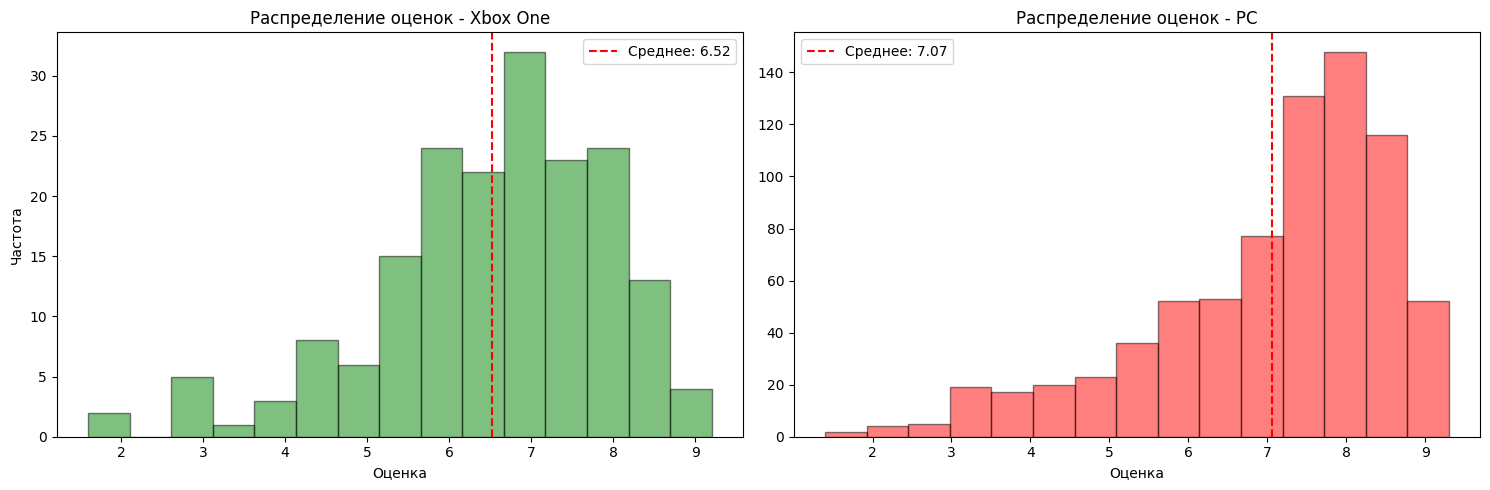

In [34]:
sample_1 = data.loc[data['platform'] == "XOne", 'user_score'].dropna()
sample_2 = data.loc[data['platform'] == "PC", 'user_score'].dropna()


var_sample_1 = sample_1.var()
var_sample_2 = sample_2.var()
variance_difference = abs(var_sample_1 - var_sample_2) / ((var_sample_1 + var_sample_2) / 2) * 100

print(f"Дисперсия Xbox One: {var_sample_1:.2f}")
print(f"Дисперсия PC: {var_sample_2:.2f}")
print(f"Различие дисперсий: {variance_difference:.2f}%\n")

levene_test = st.levene(sample_1, sample_2)
print(f"p-значение для критерия Левена: {levene_test.pvalue:.5f}")

alpha = 0.05
equal_var = levene_test.pvalue > alpha 
t_test = st.ttest_ind(sample_1, sample_2, equal_var=equal_var)
print(f"p-значение для t-теста: {t_test.pvalue:.5f}")

if t_test.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние значения отличаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние значения не отличаются.")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(sample_1, bins=15, color='green', edgecolor='black', alpha=0.5)
ax1.axvline(x=sample_1.mean(), color='red', linestyle='--', label=f'Среднее: {sample_1.mean():.2f}')
ax1.set_title("Распределение оценок - Xbox One")
ax1.set_xlabel("Оценка")
ax1.set_ylabel("Частота")
ax1.legend()

ax2.hist(sample_2, bins=15, color='red', edgecolor='black', alpha=0.5)
ax2.axvline(x=sample_2.mean(), color='red', linestyle='--', label=f'Среднее: {sample_2.mean():.2f}')
ax2.set_title("Распределение оценок - PC")
ax2.set_xlabel("Оценка")
ax2.legend()

plt.tight_layout()
plt.show()
